<H1>Ensemble Techniques - Project (Bank) </H1>


<H4>Goal</H4>
<H5>Using the data collected from existing customers, build a model that will help the marketing team identify potential 
customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. </H5>


In [281]:
# Importing all required Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("########################################################################################")
print("################  All Required Libraies has been imported successfully ################# ")
print("########################################################################################")


########################################################################################
################  All Required Libraies has been imported successfully ################# 
########################################################################################


In [282]:
print("###########################################################")
print("################  1.Univariate analysis ###################")
print("###########################################################")

###########################################################
################  1.Univariate analysis ###################
###########################################################


In [283]:
df = pd.read_csv("bank-full.csv")
print("################################################")
print("################  Load Data  ###################")
print("################################################")
df.head()

################################################
################  Load Data  ###################
################################################


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<H1> Univariate Analysis </H1>

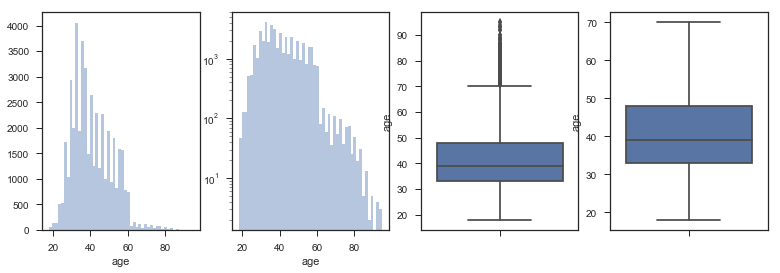

In [285]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))
sns.distplot(df.age.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(df.age.dropna()[df.age.dropna() > 1], kde=False, ax=axs[1])
sns.boxplot(df.age.dropna(), ax=axs[2], orient = 'v')
sns.boxplot(df.age.dropna(), ax=axs[3], orient = 'v', showfliers=False)
second_plt.set_yscale('log')

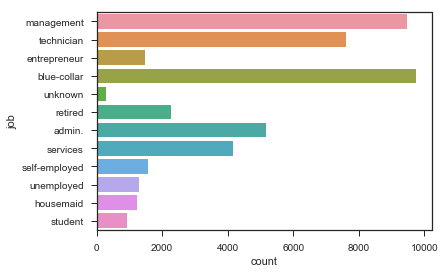

In [286]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=df)

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

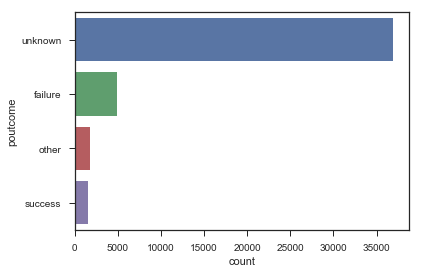

In [287]:
#poutcome
sns.set(style="ticks", color_codes=True)
sns.countplot(y='poutcome', data=df)
df.marital.value_counts()

In [288]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

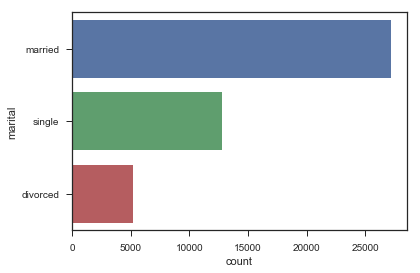

In [289]:
#marital
sns.set(style="ticks", color_codes=True)
sns.countplot(y='marital', data=df)
df.marital.value_counts()

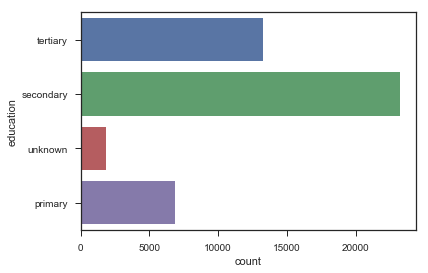

In [290]:
#education
sns.set(style="ticks", color_codes=True)
sns.countplot(y='education', data=df)

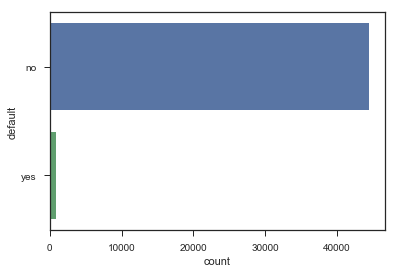

In [291]:
#default
sns.set(style="ticks", color_codes=True)
sns.countplot(y='default', data=df)

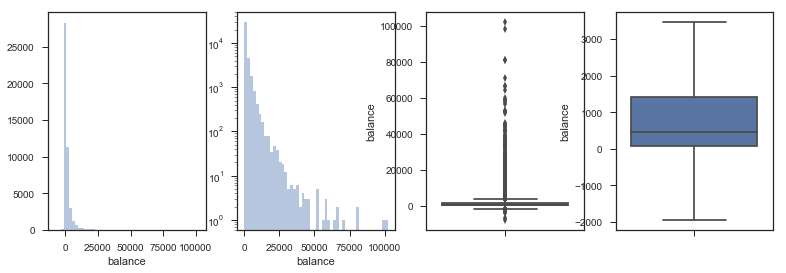

In [292]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))
sns.distplot(df.balance.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(df.balance.dropna()[df.balance.dropna() > 1], kde=False, ax=axs[1])
sns.boxplot(df.balance.dropna(), ax=axs[2], orient = 'v')
sns.boxplot(df.balance.dropna(), ax=axs[3], orient = 'v', showfliers=False)
second_plt.set_yscale('log')

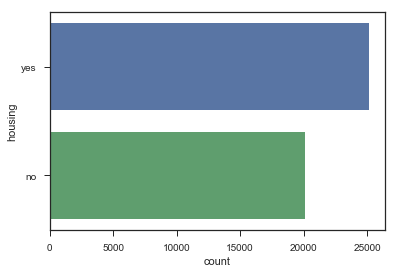

In [293]:
#marital
sns.set(style="ticks", color_codes=True)
sns.countplot(y='housing', data=df)

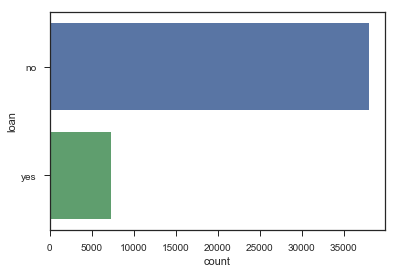

In [294]:
#marital
sns.set(style="ticks", color_codes=True)
sns.countplot(y='loan', data=df)

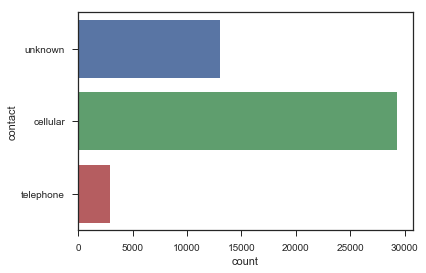

In [295]:
#marital
sns.set(style="ticks", color_codes=True)
sns.countplot(y='contact', data=df)

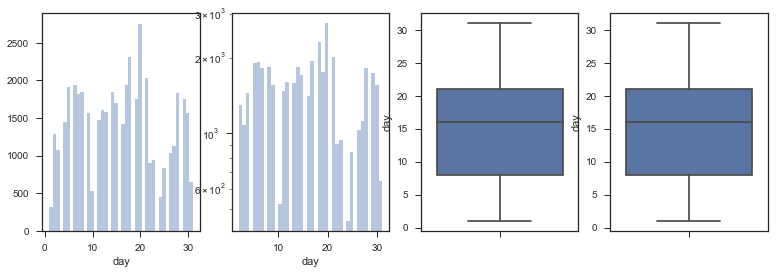

In [296]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))
sns.distplot(df.day.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(df.day.dropna()[df.day.dropna() > 1], kde=False, ax=axs[1])
sns.boxplot(df.day.dropna(), ax=axs[2], orient = 'v')
sns.boxplot(df.day.dropna(), ax=axs[3], orient = 'v', showfliers=False)
second_plt.set_yscale('log')         

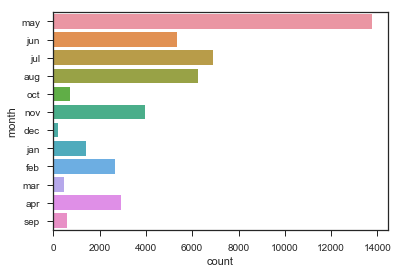

In [297]:
#marital
sns.set(style="ticks", color_codes=True)
sns.countplot(y='month', data=df)

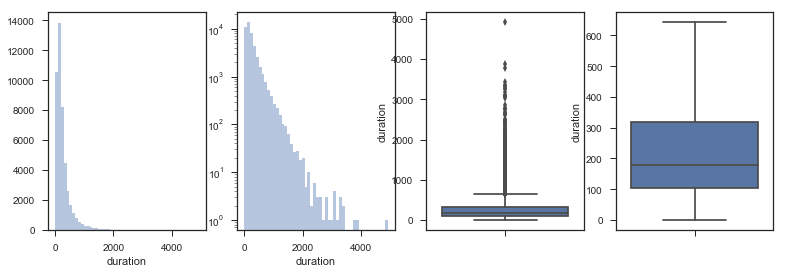

In [298]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))
sns.distplot(df.duration.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(df.duration.dropna()[df.duration.dropna() > 1], kde=False, ax=axs[1])
sns.boxplot(df.duration.dropna(), ax=axs[2], orient = 'v')
sns.boxplot(df.duration.dropna(), ax=axs[3], orient = 'v', showfliers=False)
second_plt.set_yscale('log')

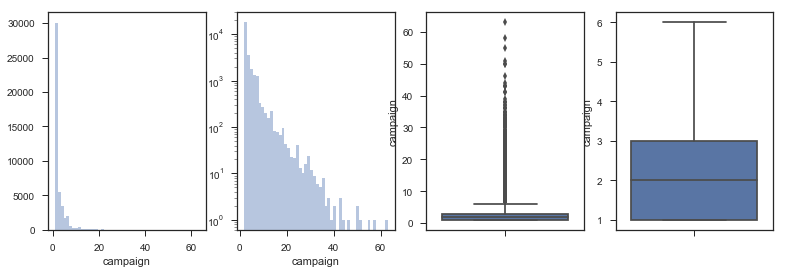

In [299]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))
sns.distplot(df.campaign.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(df.campaign.dropna()[df.campaign.dropna() > 1], kde=False, ax=axs[1])
sns.boxplot(df.campaign.dropna(), ax=axs[2], orient = 'v')
sns.boxplot(df.campaign.dropna(), ax=axs[3], orient = 'v', showfliers=False)
second_plt.set_yscale('log')

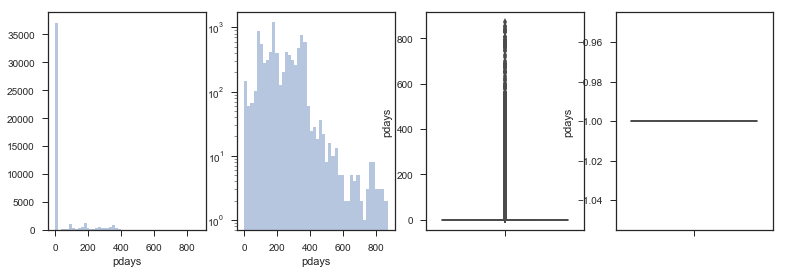

In [300]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))
sns.distplot(df.pdays.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(df.pdays.dropna()[df.pdays.dropna() > 1], kde=False, ax=axs[1])
sns.boxplot(df.pdays.dropna(), ax=axs[2], orient = 'v')
sns.boxplot(df.pdays.dropna(), ax=axs[3], orient = 'v', showfliers=False)
second_plt.set_yscale('log')

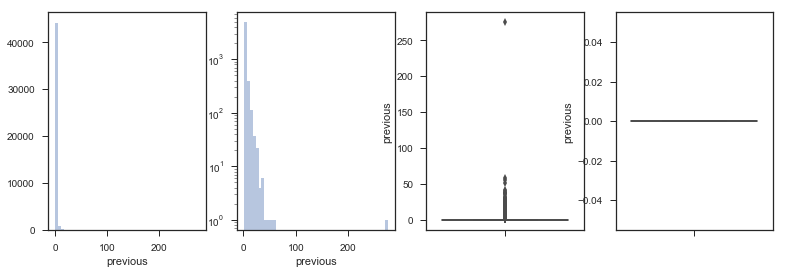

In [301]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))
sns.distplot(df. previous.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(df. previous.dropna()[df. previous.dropna() > 1], kde=False, ax=axs[1])
sns.boxplot(df. previous.dropna(), ax=axs[2], orient = 'v')
sns.boxplot(df. previous.dropna(), ax=axs[3], orient = 'v', showfliers=False)
second_plt.set_yscale('log')

PDF(probability denstiy funtion)      : [ 0.02955033  0.25982615  0.28588175  0.17727987  0.1562894   0.07325651
  0.00833868  0.00670191  0.00256575  0.00030966]

CDF(cummulative distributive function): [ 0.02955033  0.28937648  0.57525823  0.7525381   0.9088275   0.98208401
  0.99042268  0.99712459  0.99969034  1.        ]

###########################################################################################
################ CDF(cummulative distributive function) Vs PDF(probability denstiy funtion)
###########################################################################################


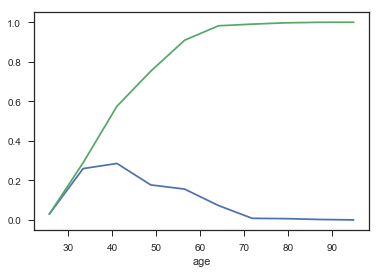

In [302]:
import matplotlib.pyplot as plt
counts, bin_edges =np.histogram(df['age'],bins=10,density=True)
plt.xlabel('age')
pdf=counts/(sum(counts))
print("PDF(probability denstiy funtion)      :",pdf)
print("")
cdf=np.cumsum(pdf)
print("CDF(cummulative distributive function):" ,cdf)
print("")
print("###########################################################################################")
print("################ CDF(cummulative distributive function) Vs PDF(probability denstiy funtion)")
print("###########################################################################################")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

In [303]:
print("##############################################################################")
print("################ Removing Unknown values in the given data se ################")
print("##############################################################################")

df = df[df.job != 'unknown']
df = df[df.education != 'unknown']
df = df[df.contact != 'unknown']
df = df[df.poutcome != 'unknown']

##############################################################################
################ Removing Unknown values in the given data se ################
##############################################################################


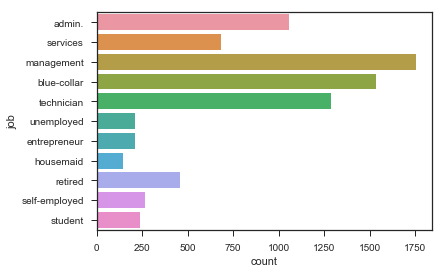

In [304]:
#After removing unknown values in job column 
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=df)

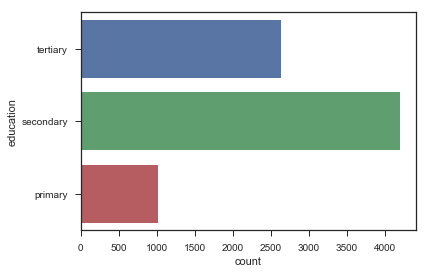

In [305]:
#After removing unknown values in education column 
sns.set(style="ticks", color_codes=True)
sns.countplot(y='education', data=df)

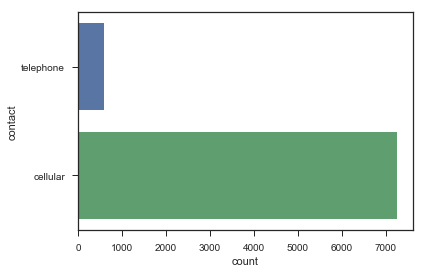

In [306]:
#After removing unknown values in contact column 
sns.set(style="ticks", color_codes=True)
sns.countplot(y='contact', data=df)

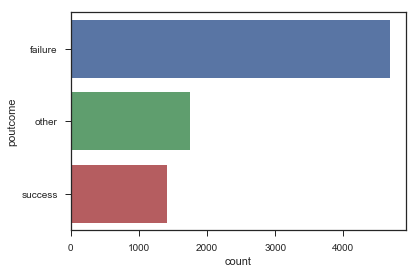

In [307]:
#After removing unknown values in poutcome column 
sns.set(style="ticks", color_codes=True)
sns.countplot(y='poutcome', data=df)

In [308]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['Target'] = le.fit_transform(new_df['Target'])
    return new_df

<H1> Bi-variate analysis  </H1>

In [309]:
new_df = categorize(df)
new_df = new_df.convert_objects(convert_numeric=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


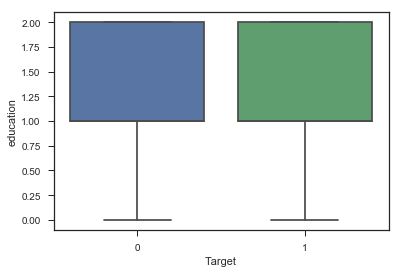

In [310]:
sns.boxplot(x='Target', y='education', data=new_df)

In [311]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
age          7842 non-null int64
job          7842 non-null int64
marital      7842 non-null int64
education    7842 non-null int64
default      7842 non-null int64
balance      7842 non-null int64
housing      7842 non-null int64
loan         7842 non-null int64
contact      7842 non-null int64
day          7842 non-null int64
month        7842 non-null int64
duration     7842 non-null int64
campaign     7842 non-null int64
pdays        7842 non-null int64
previous     7842 non-null int64
poutcome     7842 non-null object
Target       7842 non-null int64
dtypes: int64(16), object(1)
memory usage: 1.4+ MB


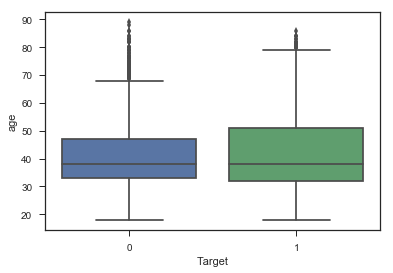

In [312]:
sns.boxplot(x='Target', y='age', data=new_df)

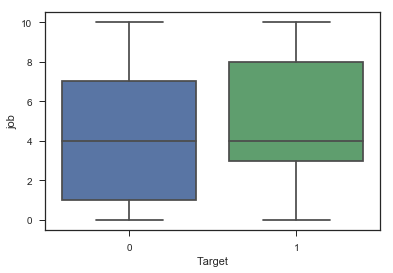

In [313]:
sns.boxplot(x='Target', y='job', data=new_df)

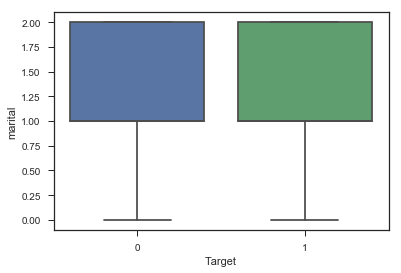

In [314]:
sns.boxplot(x='Target', y='marital', data=new_df)

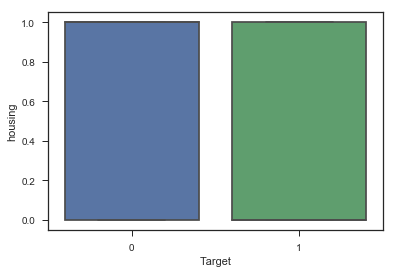

In [315]:
sns.boxplot(x='Target', y='housing', data=new_df)

In [316]:
def remove_outliers(df_para, column , minimum, maximum):
    col_values = new_df[column].values
    new_df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [317]:
min_val = new_df["duration"].min()
max_val = 1500
new_df = remove_outliers(df_para=new_df, column='duration' , minimum=min_val, maximum=max_val)

min_val = new_df["age"].min()
max_val = 80
new_df = remove_outliers(df_para=new_df, column='age' , minimum=min_val, maximum=max_val)

min_val = new_df["campaign"].min()
max_val = 6
new_df = remove_outliers(df_para=new_df, column='campaign' , minimum=min_val, maximum=max_val)

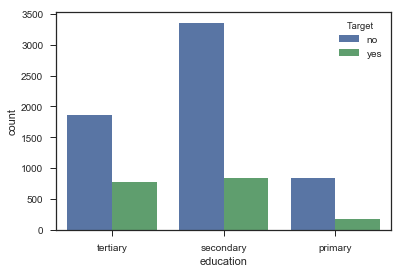

In [318]:
sns.countplot(x='education',hue='Target',data=new_df)

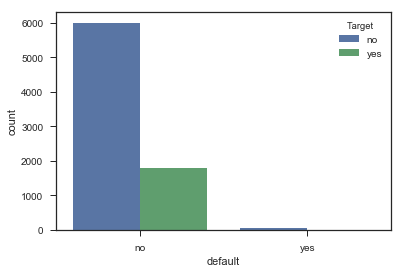

In [319]:
sns.countplot(x='default',hue='Target',data=new_df)

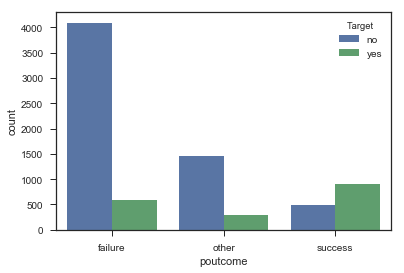

In [320]:
sns.countplot(x='poutcome',hue='Target',data=new_df)

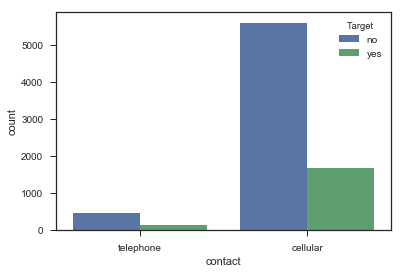

In [321]:
sns.countplot(x='contact',hue='Target',data=new_df)

<H3>Prepare the data for analytics </H3>

In [322]:
new_df = new_df.drop(['default','balance'],axis=1)

In [323]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['Target'] = le.fit_transform(new_df['Target'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    return new_df

In [324]:
new_df = categorize(df)
new_df = new_df.convert_objects(convert_numeric=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [325]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
age          7842 non-null float64
job          7842 non-null int64
marital      7842 non-null int64
education    7842 non-null int64
default      7842 non-null int64
balance      7842 non-null int64
housing      7842 non-null int64
loan         7842 non-null int64
contact      7842 non-null int64
day          7842 non-null int64
month        7842 non-null int64
duration     7842 non-null int64
campaign     7842 non-null float64
pdays        7842 non-null int64
previous     7842 non-null int64
poutcome     7842 non-null int64
Target       7842 non-null int64
dtypes: float64(2), int64(15)
memory usage: 1.1 MB


<H3>Deliverable – 3 (create the ensemble model) &  – 4 (Tuning the model) </H3>

In [326]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33.0,0,1,2,0,882,0,0,1,21,10,39,1.0,151,3,0,0
24062,42.0,0,2,1,0,-247,1,1,1,21,10,519,1.0,166,1,1,1
24064,33.0,7,1,1,0,3444,1,0,1,21,10,144,1.0,91,4,0,1
24072,36.0,4,1,2,0,2415,1,0,1,22,10,73,1.0,86,4,1,0
24077,36.0,4,1,2,0,0,1,0,1,23,10,140,1.0,143,3,0,1


In [327]:
from sklearn.preprocessing import OneHotEncoder

In [328]:
enc = OneHotEncoder()
enc.fit(new_df[categorical_vars])
tr=enc.transform(new_df[categorical_vars]).toarray()

enc_col=[str(i) for i in range(tr.shape[1])]
for no,i in enumerate(enc_col):
    new_df[i]=tr[:,no]

In [329]:
new_df=new_df.drop(categorical_vars,axis=1)

In [330]:
new_df.head()

,age,balance,day,duration,campaign,pdays,previous,0,1,2,...,32,33,34,35,36,37,38,39,40,41
24060,33.0,882,21,39,1.0,151,3,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
24062,42.0,-247,21,519,1.0,166,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
24064,33.0,3444,21,144,1.0,91,4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
24072,36.0,2415,22,73,1.0,86,4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
24077,36.0,0,23,140,1.0,143,3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

In [ ]:
s = [1 for n in range(len(X_embedded[:,0]))]
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=df1[target].values,s=s)
plt.show()
#these tsne plots show a clear distinction between the yes and no clusters..

In [ ]:
#we can use knn classifier in this tsne results variables..
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#split dataset into train and test data according to stratification..
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
#fitting the model and predictions on the test data..
from sklearn.metrics import accuracy_score

for i in range(10,400,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    print(accuracy_score(neigh.predict(X_test),y_test))

In [ ]:
# we can do oversampling on the non tsne X to get a balanced result..
x_train, x_val, y_train, y_val = train_test_split(X, y,test_size = .1,random_state=12)

In [199]:
X_train.shape

(5489, 10)

In [200]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [201]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [202]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.810454738632
Confusion Matrix : 
 [[1673  138]
 [ 308  234]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.84      0.92      0.88      1811
          1       0.63      0.43      0.51       542

avg / total       0.79      0.81      0.80      2353

